In [12]:
import sys
import pickle
import numpy as np
from numpy import array, ndarray
from pandas import read_csv, DataFrame, Series, concat
from matplotlib.pyplot import figure, savefig, show, subplots
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from scipy.stats import norm, expon, lognorm
from sklearn.neighbors import KNeighborsClassifier

sys.path.insert(1, '../../../../utils')
from dslabs_functions import get_variable_types, \
  CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart, plot_multiline_chart, plot_evaluation_results, \
  plot_horizontal_bar_chart, HEIGHT, plot_line_chart, dummify, run_NB, run_KNN, plot_multibar_chart, \
  encode_cyclic_variables, plot_confusion_matrix, NR_STDEV, determine_outlier_thresholds_for_var
from studies import naive_Bayes_study, knn_study, evaluate_approach, evaluate_and_plot 


In [13]:
# def best_model_nb(
#     features_train: DataFrame,
#     target_train: DataFrame,
#     features_test: DataFrame,
#     target_test: DataFrame,
#     lab_folder: str,
#     file_tag: str,
#     approach: str,
#     eval_metric: str = "accuracy"
# ) -> {DataFrame, DataFrame}:
#     figure()
#     nb_best_model_acc, nb_params_acc = naive_Bayes_study(
#         features_train,
#         target_train,
#         features_test,
#         target_test,
#         metric=eval_metric
#     )
#     savefig(f"../../charts/{lab_folder}/{file_tag}_{approach}_nb_{eval_metric}_study.png", bbox_inches='tight')
#     show()
#     return nb_best_model_acc, nb_params_acc

In [14]:
# def best_model_knn(
#     features_train: DataFrame,
#     target_train: DataFrame,
#     features_test: DataFrame,
#     target_test: DataFrame,
#     lab_folder: str,
#     file_tag: str,
#     approach: str,
#     k_max: int = 25,
#     lag: int = 2,
#     eval_metric: str = "accuracy"
# ) :
    
#     figure()
#     knn_best_model, knn_params = knn_study(
#         features_train,
#         target_train,
#         features_test,
#         target_test,
#         k_max,
#         lag,
#         metric=eval_metric,
#     )
#     savefig(f"../../charts/{lab_folder}/{file_tag}_{approach}_knn_{eval_metric}_study.png", bbox_inches='tight')
#     show()     
#     return knn_best_model, knn_params  

In [15]:
# def knn_overfitting(
#     features_train: DataFrame,
#     target_train: DataFrame,
#     features_test: DataFrame,
#     target_test: DataFrame,
#     params: DataFrame,
#     lab_folder: str,
#     file_tag: str,
#     approach: str,
#     k_max: int = 25,
#     lag: int = 2,
#     acc_metric: str = "accuracy"
# ):
#     distance = params["params"][1]   # best distance from KNN study, e.g. 'euclidean'
#     kvalues = [i for i in range(1, k_max + 1, lag)]

#     y_tst_values = []
#     y_trn_values = []
    
#     for k in kvalues:
#         clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
#         clf.fit(features_train, target_train)
#         prd_tst_Y = clf.predict(features_test)
#         prd_trn_Y = clf.predict(features_train)

#         y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](target_test, prd_tst_Y))
#         y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](target_train, prd_trn_Y))
                        
#     figure()
#     plot_multiline_chart(
#         kvalues,
#         {"Train": y_trn_values, "Test": y_tst_values},
#         title=f"KNN overfitting study for {distance}",
#         xlabel="K",
#         ylabel=acc_metric,
#         percentage=True,
#     )
#     savefig(f"../charts/{lab_folder}/{file_tag}_{approach}_knn_overfitting.png", bbox_inches='tight')
#     show()

In [16]:
# def predict_eval(features_train: DataFrame,
#     target_train: DataFrame,
#     features_test: DataFrame,
#     target_test: DataFrame,
#     best_model: DataFrame,
#     params: DataFrame,
#     lab_folder: str,
#     file_tag: str,
#     approach: str
# ) -> None:
#     prd_trn = best_model.predict(features_train)
#     prd_tst = best_model.predict(features_test)
#     nb_labels = sorted(np.unique(target_train))

#     figure()
#     plot_evaluation_results(
#         params,
#         array(target_train),
#         array(prd_trn),
#         array(target_test),
#         array(prd_tst),
#         nb_labels
#     )
#     savefig(f'../../charts/{lab_folder}/{file_tag}_{approach}_{params["name"]}_best_{params["metric"]}_eval.png', bbox_inches='tight')
#     show()

In [17]:
# def separate_train_test(
#     data: DataFrame, 
#     target: str, 
#     test_size: float,
#     random_state: int
# ) -> {DataFrame, DataFrame, DataFrame, DataFrame}:
#     df = data.copy()
    
#     y = df.pop(target).values
#     X = df.values
    
#     # Split the data
#     trnX, tstX, trnY, tstY = train_test_split(
#         X, y, test_size=test_size, random_state=random_state
#     )
    
#     return trnX, tstX, trnY, tstY

In [18]:
file_tag = "traffic"
lab_folder = "lab3_preparation/outliers"
target_name = "crash_type"
filename = "../../data/prepared/traffic_enc1.csv"
# filename = "../../data/prepared/traffic_enc2.csv"
data: DataFrame = read_csv(filename, na_values="")
variable_types: dict[str, list] = get_variable_types(data)
data.shape

(209306, 150)

### **Outliers** ###

### Approach 1 ###

In [19]:
task = "outliers"
approach_1 = "drop_outliers"

In [20]:
n_std: int = NR_STDEV
numeric_vars: list[str] = get_variable_types(data)["numeric"]
if numeric_vars is not None:
    df_1: DataFrame = data.copy(deep=True)
    summary5: DataFrame = data[numeric_vars].describe()
    for var in numeric_vars:
        top_threshold, bottom_threshold = determine_outlier_thresholds_for_var(
            summary5[var]
        )
        outliers: Series = df_1[(df_1[var] > top_threshold) | (df_1[var] < bottom_threshold)]
        df_1.drop(outliers.index, axis=0, inplace=True)
    df_1.to_csv(f"../../data/prepared/{file_tag}_{task}_{approach_1}.csv", index=True)
    print(f"Data after dropping outliers: {df_1.shape}")
else:
    print("There are no numeric variables")

Data after dropping outliers: (138419, 150)


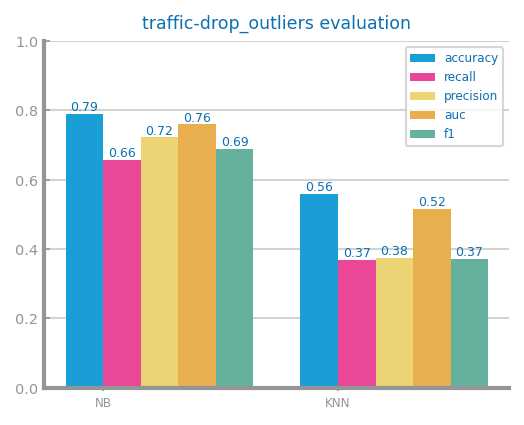

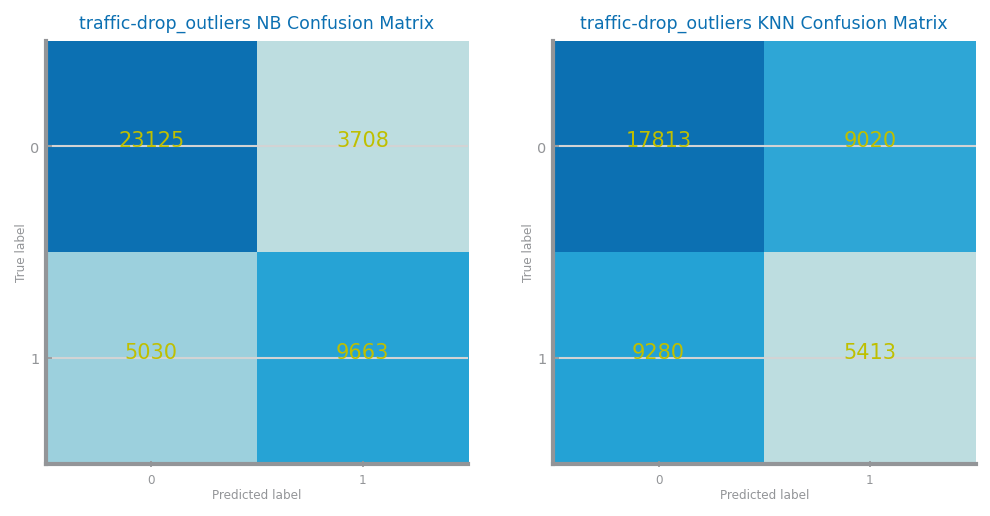

In [21]:
evaluate_and_plot(df_1, lab_folder, file_tag, approach_1, target_name)

In [22]:
# trnX_1, tstX_1, trnY_1, tstY_1 = separate_train_test(df_1, target_name, 0.3, 42)    

**NAIVE BAYES ANALYSIS - 1**

In [23]:
# nb_best_model_acc_1, nb_params_acc_1 = best_model_nb(
#     trnX_1, trnY_1, tstX_1, tstY_1, 
#     lab_folder, file_tag, approach_1,
#     eval_metric = "accuracy"
# ) 

In [24]:
# nb_best_model_rec_1, nb_params_rec_1 = best_model_nb(
#     trnX_1, trnY_1, tstX_1, tstY_1, 
#     lab_folder, file_tag, approach_1,
#     eval_metric = "recall"
# ) 

In [25]:
# predict_eval(trnX_1, trnY_1, tstX_1, tstY_1, 
#     nb_best_model_rec_1, nb_params_rec_1,
#     lab_folder, file_tag, approach_1,
# )

**KNN ANALYSIS - 1**

In [26]:
# knn_best_model_acc_1, knn_params_acc_1 = best_model_knn(
#     trnX_1, trnY_1, tstX_1, tstY_1, 
#     lab_folder, file_tag, approach_1,
#     k_max=20, lag=5, eval_metric = "accuracy"
# ) 

In [27]:
# predict_eval(trnX_1, trnY_1, tstX_1, tstY_1, 
#     knn_best_model_acc_1, knn_params_acc_1 ,
#     lab_folder, file_tag, approach_1,
# )

In [28]:
# knn_overfitting(trnX_1, trnY_1, tstX_1, tstY_1, 
#     knn_params_acc_1, lab_folder, file_tag, approach_1,
#     k_max=20, lag=5, eval_metric = "accuracy"
# )

### Approach 2 ###

In [29]:
approach_2 = "replacing_outliers"

In [30]:
if [] != numeric_vars:
    df_2: DataFrame = data.copy(deep=True)
    for var in numeric_vars:
        top, bottom = determine_outlier_thresholds_for_var(summary5[var])
        median: float = df_2[var].median()
        df_2[var] = df_2[var].apply(lambda x: median if x > top or x < bottom else x)
    df_2.to_csv(f"../../data/prepared/{file_tag}_{task}_{approach_2}.csv", index=True)
    print("Data after replacing outliers:", df_2.shape)
    print(df_2.describe())
else:
    print("There are no numeric variables")

Data after replacing outliers: (209306, 150)
         crash_date     crash_type  intersection_related_i         damage  \
count  2.093060e+05  209306.000000           209306.000000  209306.000000   
mean   1.609386e+18       0.439213                0.952309       1.803111   
std    7.425389e+16       0.496292                0.213112       0.397649   
min    1.454883e+18       0.000000                0.000000       1.000000   
25%    1.546545e+18       0.000000                1.000000       2.000000   
50%    1.608397e+18       0.000000                1.000000       2.000000   
75%    1.673145e+18       1.000000                1.000000       2.000000   
max    1.737159e+18       1.000000                1.000000       2.000000   

       num_units  most_severe_injury  injuries_total  injuries_fatal  \
count   209306.0       209306.000000   209306.000000        209306.0   
mean         2.0            0.378054        0.183358             0.0   
std          0.0            0.732383        0

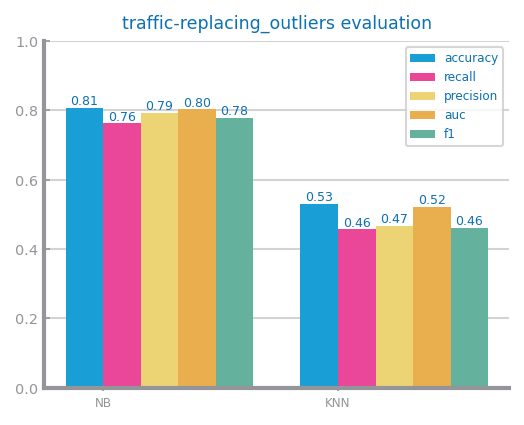

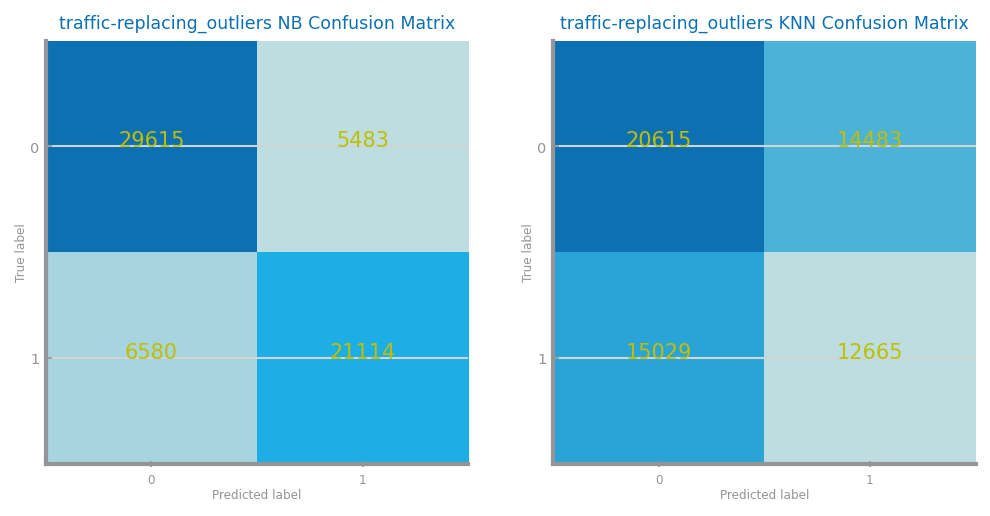

In [32]:
evaluate_and_plot(df_2, lab_folder, file_tag, approach_2, target_name)

In [33]:
# trnX_2, tstX_2, trnY_2, tstY_2 = separate_train_test(df_2, target_name, 0.3, 42)    

**NAIVE BAYES ANALYSIS - 2**

In [34]:
# nb_best_model_acc_2, nb_params_acc_2 = best_model_nb(
#     trnX_2, trnY_2, tstX_2, tstY_2, 
#     lab_folder, file_tag, approach_2,
#     eval_metric = "accuracy"
# ) 

In [35]:
# nb_best_model_rec_2, nb_params_rec_2 = best_model_nb(
#     trnX_2, trnY_2, tstX_2, tstY_2, 
#     lab_folder, file_tag, approach_2,
#     eval_metric = "recall"
# ) 

In [36]:
# predict_eval(trnX_2, trnY_2, tstX_2, tstY_2, 
#     nb_best_model_rec_2, nb_params_rec_2,
#     lab_folder, file_tag, approach_2,
# )

**KNN ANALYSIS - 2**

In [37]:
# knn_best_model_acc_2, knn_params_acc_2 = best_model_knn(trnX_2, trnY_2, tstX_2,  tstY_2, 
#     lab_folder, file_tag, approach_2,
#     k_max=20, lag=5, eval_metric = "accuracy"
# ) 

In [38]:
# predict_eval(trnX_2, trnY_2, tstX_2, tstY_2, 
#     knn_best_model_acc_2, knn_params_acc_2,
#     lab_folder, file_tag, approach_2,
# )

In [39]:
# knn_overfitting(trnX_2, trnY_2, tstX_2, tstY_2, 
#     knn_params_acc_2, lab_folder, file_tag, approach_2,
#     k_max=20, lag=5, eval_metric = "accuracy"
# )

### Approach 3 ###

In [40]:
approach_3 = "truncate_outliers"

In [41]:
if [] != numeric_vars:
    df_3: DataFrame = data.copy(deep=True)
    for var in numeric_vars:
        top, bottom = determine_outlier_thresholds_for_var(summary5[var])
        df_3[var] = df_3[var].apply(
            lambda x: top if x > top else bottom if x < bottom else x
        )
    df_3.to_csv(f"../../data/prepared/{file_tag}_{task}_{approach_3}.csv", index=True)
    print("Data after truncating outliers:", df_3.shape)
    print(df_3.describe())
else:
    print("There are no numeric variables")

Data after truncating outliers: (209306, 150)
         crash_date     crash_type  intersection_related_i         damage  \
count  2.093060e+05  209306.000000           209306.000000  209306.000000   
mean   1.607552e+18       0.439213                0.952309       1.632463   
std    7.612836e+16       0.496292                0.213112       0.595890   
min    1.454876e+18       0.000000                0.000000       0.281394   
25%    1.543832e+18       0.000000                1.000000       1.000000   
50%    1.608396e+18       0.000000                1.000000       2.000000   
75%    1.673145e+18       1.000000                1.000000       2.000000   
max    1.737159e+18       1.000000                1.000000       2.000000   

           num_units  most_severe_injury  injuries_total  injuries_fatal  \
count  209306.000000       209306.000000   209306.000000   209306.000000   
mean        2.042713            0.451443        0.336197        0.000162   
std         0.250924            

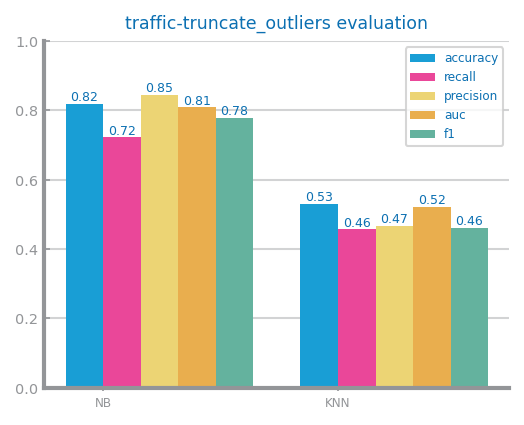

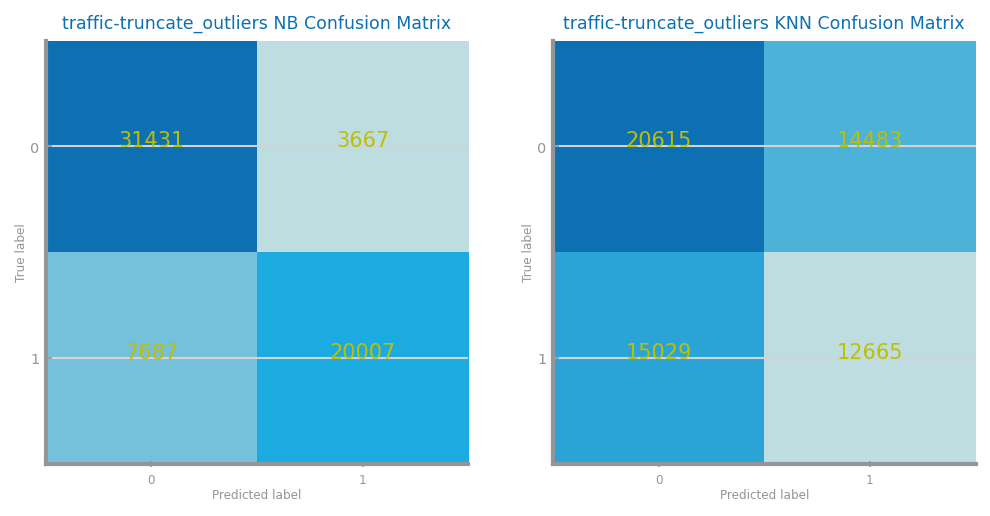

In [42]:
evaluate_and_plot(df_3, lab_folder, file_tag, approach_3, target_name)

In [43]:
# trnX_3, tstX_3, trnY_3, tstY_3 = separate_train_test(df_3, target_name, 0.3, 42)    

**NAIVE BAYES ANALYSIS - 3**

In [44]:
# nb_best_model_acc_3, nb_params_acc_3 = best_model_nb(
#     trnX_3, trnY_3, tstX_3, tstY_3, 
#     lab_folder, file_tag, approach_3,
#     eval_metric = "accuracy"
# ) 

In [45]:
# nb_best_model_rec_3, nb_params_rec_3 = best_model_nb(trnX_3, trnY_3, tstX_3,  tstY_3, 
#     lab_folder, file_tag, approach_3,
#     eval_metric = "recall"
# ) 

In [46]:
# predict_eval(trnX_3, trnY_3, tstX_3, tstY_3, 
#     nb_best_model_rec_3, nb_params_rec_3,
#     lab_folder, file_tag, approach_3,
# )

**KNN ANALYSIS - 3**

In [47]:
# knn_best_model_acc_3, knn_params_acc_3 = best_model_knn(
#     trnX_3, trnY_3, tstX_3, tstY_3, 
#     lab_folder, file_tag, approach_3,
#     k_max=20, lag=5, eval_metric = "accuracy"
# ) 

In [48]:
# predict_eval(trnX_3, trnY_3, tstX_3, tstY_3, 
#     knn_best_model_acc_3, knn_params_acc_3,
#     lab_folder, file_tag, approach_3,
# )

In [49]:
# knn_overfitting(trnX_3, trnY_3, tstX_3, tstY_3, 
#     knn_params_acc_3, lab_folder, file_tag, approach_3,
#     k_max=20, lag=5, eval_metric = "accuracy"
# )